In [25]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

N = 20000

def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

def random_specification():
    power = random.choice([100, 200, 300, 400])
    size = random.choice(["Petit", "Moyen", "Grand"])
    weight = random.choice([100, 200, 300, 400])
    return f"{power} HP, {size}, {weight} kg"

def incidents_fabrication(id_usine):
    if id_usine in [1, 2]:
        return np.random.randint(0, 2)  # Moins d'incidents dans les usines 1 et 2
    else:
        return np.random.randint(0, 4)

# Mise à jour de la fonction pour inclure l'impact des incidents sur la durée de fabrication
def fabrication_duration(id_usine, incidents):
    base_duration = np.random.randint(1, 30)  # Durée de base en jours
    incident_impact = incidents * 2  # Chaque incident ajoute 2 jours à la durée de base
    if id_usine == 4:
        return (base_duration + incident_impact) * 2  # L'usine 4 prend deux fois plus de temps
    else:
        return base_duration + incident_impact
    
def cout_fabrication(type_moteur):
    if type_moteur == "Diesel":
        return 1000
    elif type_moteur == "Électrique":
        return 1500
    elif type_moteur == "Hybride":
        return 1200


def delai_livraison(mode_expedition):
    if mode_expedition == "Terrestre":
        return 7
    elif mode_expedition == "Aérien":
        return 3
    elif mode_expedition == "Maritime":
        return 14


def demande_client(type_moteur):
    if type_moteur == "Diesel":
        return 80
    elif type_moteur == "Électrique":
        return 95
    elif type_moteur == "Hybride":
        return 85


df = pd.DataFrame({
    "ID_Moteur": range(1, N + 1),
    "Type_Moteur": np.random.choice(["Diesel", "Électrique", "Hybride"], N),
    "Spécifications": [random_specification() for _ in range(N)],
    "ID_Usine": np.random.randint(1, 5, N),
    "Localisation_Usine": np.random.choice(["Usine A", "Usine B", "Usine C", "Usine D"], N),
    "Date_Début_Fabrication": [random_date(datetime(2020, 1, 1), datetime(2020, 12, 31)) for _ in range(N)],
})

# Génération des incidents avant de calculer la durée de fabrication
df["Incidents_Fabrication"] = df["ID_Usine"].apply(incidents_fabrication)

# Calcul de la durée de fabrication en prenant en compte les incidents
df["Durée_Fabrication"] = df.apply(lambda x: fabrication_duration(x["ID_Usine"], x["Incidents_Fabrication"]), axis=1)

df["Date_Fin_Fabrication"] = df["Date_Début_Fabrication"] + pd.to_timedelta(df["Durée_Fabrication"], unit='d')
df["Coût_Fabrication"] = df["Type_Moteur"].apply(cout_fabrication)*(1+np.random.rand(1)[0])
df["Contrôles_Qualité_Passés"] = np.random.randint(0, 5, N)
df["Mode_Expédition"] = np.random.choice(["Terrestre", "Aérien", "Maritime"], N)
df["Délai_Livraison"] = df["Mode_Expédition"].apply(delai_livraison)*(1+np.random.rand(1)[0])
df["Coût_Expédition"] = np.random.uniform(100, 1000, N).round(2)
df["Demande_Client"] = df["Type_Moteur"].apply(demande_client)*(1+np.random.rand(1)[0])
df["Capacité_Production_Usine"] = df["ID_Usine"].map({1: 400, 2: 300, 3: 200, 4: 100})
df["Stocks_Disponibles"] = np.random.randint(0, 50, N)




In [24]:
1+np.random.rand(1)[0]

1.5503717994204083

In [26]:
df.head(10)


,ID_Moteur,Type_Moteur,Spécifications,ID_Usine,Localisation_Usine,Date_Début_Fabrication,Incidents_Fabrication,Durée_Fabrication,Date_Fin_Fabrication,Coût_Fabrication,Contrôles_Qualité_Passés,Mode_Expédition,Délai_Livraison,Coût_Expédition,Demande_Client,Capacité_Production_Usine,Stocks_Disponibles
0,1,Diesel,"300 HP, Moyen, 100 kg",2,Usine A,2020-06-22 17:35:11,0,13,2020-07-05 17:35:11,1832.949309,1,Maritime,27.888438,802.05,119.642993,300,14
1,2,Électrique,"200 HP, Petit, 200 kg",2,Usine D,2020-04-19 11:01:50,0,20,2020-05-09 11:01:50,2749.423963,3,Terrestre,13.944219,277.29,142.076054,300,15
2,3,Hybride,"400 HP, Grand, 200 kg",1,Usine B,2020-03-18 08:33:12,1,5,2020-03-23 08:33:12,2199.539170,2,Aérien,5.976094,257.80,127.120680,400,1
3,4,Hybride,"200 HP, Petit, 100 kg",3,Usine D,2020-08-03 19:31:19,2,21,2020-08-24 19:31:19,2199.539170,0,Aérien,5.976094,122.08,127.120680,200,36
4,5,Électrique,"400 HP, Petit, 100 kg",3,Usine C,2020-10-04 09:46:02,2,15,2020-10-19 09:46:02,2749.423963,3,Maritime,27.888438,618.49,142.076054,200,27
5,6,Électrique,"300 HP, Moyen, 400 kg",2,Usine B,2020-11-14 05:00:47,1,10,2020-11-24 05:00:47,2749.423963,0,Terrestre,13.944219,445.16,142.076054,300,10
6,7,Diesel,"200 HP, Grand, 400 kg",1,Usine A,2020-08-22 20:07:30,0,2,2020-08-24 20:07:30,1832.949309,3,Terrestre,13.944219,235.55,119.642993,400,2
7,8,Hybride,"100 HP, Petit, 300 kg",2,Usine A,2020-08-20 12:04:24,0,18,2020-09-07 12:04:24,2199.539170,1,Maritime,27.888438,729.76,127.120680,300,26
8,9,Électrique,"200 HP, Petit, 200 kg",4,Usine D,2020-04-18 12:45:04,1,54,2020-06-11 12:45:04,2749.423963,4,Maritime,27.888438,729.47,142.076054,100,47
9,10,Hybride,"300 HP, Grand, 100 kg",2,Usine D,2020-04-25 19:18:00,0,2,2020-04-27 19:18:00,2199.539170,0,Aérien,5.976094,471.85,127.120680,300,43


In [ ]:
df.to_csv("dataset_moteurs_enrichi.csv", index=False)

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sélection et standardisation des caractéristiques pour le clustering
features = df[["Durée_Fabrication", "Coût_Fabrication", "Délai_Livraison", "Coût_Expédition"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


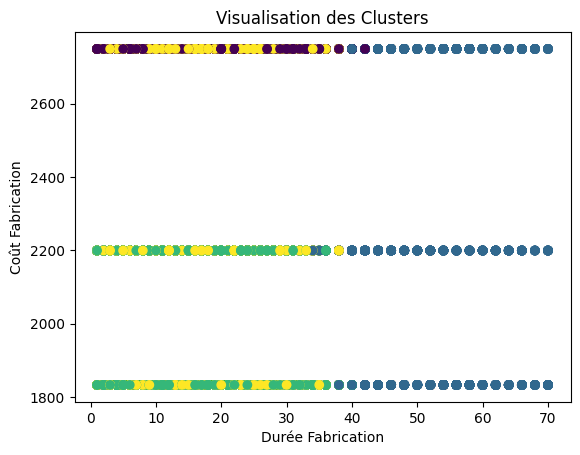

In [28]:
# Définition du modèle KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisation des clusters (optionnel)
plt.scatter(df['Durée_Fabrication'], df['Coût_Fabrication'], c=df['Cluster'])
plt.xlabel('Durée Fabrication')
plt.ylabel('Coût Fabrication')
plt.title('Visualisation des Clusters')
plt.show()
